# DATA CLEANING 

#### 0 step. Import necessary libraries

In [5]:
#-------------------------- 

import pandas as pd
import numpy as np

#### 1 step. Upload our dataset

In [6]:
#-------------------------- 

df = pd.read_csv('dirty_krisha_data_with_coord_apartmnt.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)

#### 2 step. Analyse the dataset

In [7]:
#-------------------------- 

print(df.info())
print()
print(df.describe().round(1))
print()
print(df.isnull().sum())
print()
print(df['type_of_house'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            7703 non-null   float64
 1   area             7736 non-null   object 
 2   flat_toilets     3957 non-null   object 
 3   balcony          993 non-null    object 
 4   current_floors   7600 non-null   float64
 5   total_floors     7600 non-null   float64
 6   ceiling          3041 non-null   float64
 7   dorm             4547 non-null   object 
 8   mortgage         308 non-null    object 
 9   year             7736 non-null   int64  
 10  type_of_house    6689 non-null   object 
 11  condition        3424 non-null   object 
 12  repair_status    2698 non-null   object 
 13  type_of_floor    2634 non-null   object 
 14  street           7736 non-null   object 
 15  latitude         6729 non-null   float64
 16  longitude        6729 non-null   float64
 17  is_in_koksheta

#### 3 step. Count of False in 'is_in_kokshetau' column

In [8]:
#-------------------------- 

count_false = (df['is_in_kokshetau'] == False).sum()

print('Sum of False in the "is_in_kokshetau column":', count_false)
print()
print(df.isna().sum())


Sum of False in the "is_in_kokshetau column": 1199

price                33
area                  0
flat_toilets       3779
balcony            6743
current_floors      136
total_floors        136
ceiling            4695
dorm               3189
mortgage           7428
year                  0
type_of_house      1047
condition          4312
repair_status      5038
type_of_floor      5102
street                0
latitude           1007
longitude          1007
is_in_kokshetau       0
dtype: int64


#### 4 step. Drop duplicates, price where NaN, rows where column 'is_in_kokshetau' == False

In [9]:
#-------------------------- 

df.drop_duplicates(inplace=True)
df = df.dropna(subset=['price']).reset_index(drop=True)
df = df[df['is_in_kokshetau'] != False].reset_index(drop=True)

df.reset_index(drop=True, inplace=True)
df.head()

,price,area,flat_toilets,balcony,current_floors,total_floors,ceiling,dorm,mortgage,year,type_of_house,condition,repair_status,type_of_floor,street,latitude,longitude,is_in_kokshetau
0,9500000.0,39,совмещенный,лоджия,4.0,5.0,NaN,нет,NaN,1979,NaN,свежий ремонт,NaN,NaN,"Юбилейный 43, Кокшетау",53.269046,69.424945,True
1,39000000.0,76.1,NaN,NaN,4.0,10.0,3.0,NaN,NaN,2021,кирпичный,свежий ремонт,частично,ламинат,"Кенесары 41а, Кокшетау",53.262199,69.369769,True
2,29990000.0,75,NaN,NaN,9.0,10.0,3.0,NaN,NaN,2024,кирпичный,свежий ремонт,полностью,ламинат,"Сарыарка 2г, Кокшетау",53.320954,69.385960,True
3,10900000.0,37,совмещенный,балкон,1.0,5.0,NaN,нет,NaN,1966,NaN,"не новый, но аккуратный ремонт",частично,ламинат,"Абылай хана, Кокшетау",53.285470,69.381409,True
4,13400000.0,50.8,совмещенный,NaN,6.0,6.0,2.7,нет,NaN,1990,панельный,"не новый, но аккуратный ремонт",частично,линолеум,"Абылай хана 20, Кокшетау",53.300842,69.387853,True


#### 5 step. Fill in the NaN values with the value "нет"

In [10]:
#-------------------------- 

df['mortgage'] = df['mortgage'].fillna('нет')
df['balcony'] = df['balcony'].fillna('нет')
df['dorm'] = df['dorm'].fillna('нет')
df.isnull().sum()

price                 0
area                  0
flat_toilets       2313
balcony               0
current_floors       78
total_floors         78
ceiling            3017
dorm                  0
mortgage              0
year                  0
type_of_house       668
condition          2689
repair_status      3267
type_of_floor      3308
street                0
latitude              0
longitude             0
is_in_kokshetau       0
dtype: int64

#### 6 step. Fill in the NaN values with the value of mode or median 

In [11]:
#-------------------------- 

df['ceiling'].fillna(df['ceiling'].median(), inplace=True)
df['repair_status'].fillna(df['repair_status'].mode()[0], inplace=True)
df['flat_toilets'].fillna(df['flat_toilets'].mode()[0], inplace=True)
df['type_of_house'].fillna(df['type_of_house'].mode()[0], inplace=True)

df.isnull().sum()

price                 0
area                  0
flat_toilets          0
balcony               0
current_floors       78
total_floors         78
ceiling               0
dorm                  0
mortgage              0
year                  0
type_of_house         0
condition          2689
repair_status         0
type_of_floor      3308
street                0
latitude              0
longitude             0
is_in_kokshetau       0
dtype: int64

#### 7 step. Analyse the non-null count and dtype

In [12]:
#-------------------------- 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5349 non-null   float64
 1   area             5349 non-null   object 
 2   flat_toilets     5349 non-null   object 
 3   balcony          5349 non-null   object 
 4   current_floors   5271 non-null   float64
 5   total_floors     5271 non-null   float64
 6   ceiling          5349 non-null   float64
 7   dorm             5349 non-null   object 
 8   mortgage         5349 non-null   object 
 9   year             5349 non-null   int64  
 10  type_of_house    5349 non-null   object 
 11  condition        2660 non-null   object 
 12  repair_status    5349 non-null   object 
 13  type_of_floor    2041 non-null   object 
 14  street           5349 non-null   object 
 15  latitude         5349 non-null   float64
 16  longitude        5349 non-null   float64
 17  is_in_koksheta

#### 8 step. Drop unnecessary columns and rows

In [13]:
#-------------------------- 

df.drop(columns=['condition'], inplace=True)  
df.drop(columns=['type_of_floor'], inplace=True)  
df.dropna(subset=['current_floors', 'total_floors'], inplace=True)
df = df[df['year'] != 2025]

df.reset_index(drop=True, inplace=True)
df.isnull().sum()

price              0
area               0
flat_toilets       0
balcony            0
current_floors     0
total_floors       0
ceiling            0
dorm               0
mortgage           0
year               0
type_of_house      0
repair_status      0
street             0
latitude           0
longitude          0
is_in_kokshetau    0
dtype: int64

#### 9 step. Check the unique value of 'year' and 'ceiling' columns

In [14]:
#-------------------------- 

print(df['year'].unique())
print()
print(df['ceiling'].unique())


[1979 2021 2024 1966 1990 2023 1974 2019 1998 2022 1982 2020 1976 2018
 1989 1980 1984 2015 1993 1963 1992 2005 1996 2008 1983 1985 2011 1991
 1971 1999 2004 1988 1960 2017 1977 1987 1964 1978 1994 1965 1970 1961
 2000 1986 1967 1973 1997 1968 1969 1972 2013 2007 2014 2006 1962 1981
 2016 2010 1975 2001 2012 2002 2003 1958 1995 2009 1950 1947 1954 1959
 1956 1936 1940]

[  2.7    3.     2.75   2.6    3.4    2.8    2.5    2.85   3.2    2.65
   2.9    2.3    2.    27.     2.2    2.55   3.1    3.6    2.45  28.
   2.62   2.95  25.     3.06   2.4    2.35   2.78   2.1  100.     2.88
   3.05]


#### 10 step. Replace the abnormal value with the median value

In [15]:
#-------------------------- 

print(df[df['ceiling'] == 100])

df['ceiling'] = df['ceiling'].replace(100, df['ceiling'].median())

print(df['ceiling'].unique())


           price area flat_toilets balcony  current_floors  total_floors  \
4724  18000000.0   65   раздельный  лоджия             5.0           5.0   

      ceiling dorm mortgage  year type_of_house repair_status  \
4724    100.0  нет      нет  1989     панельный     полностью   

                          street  latitude  longitude  is_in_kokshetau  
4724  Васильковский 26, Кокшетау   53.3134  69.388165             True  
[ 2.7   3.    2.75  2.6   3.4   2.8   2.5   2.85  3.2   2.65  2.9   2.3
  2.   27.    2.2   2.55  3.1   3.6   2.45 28.    2.62  2.95 25.    3.06
  2.4   2.35  2.78  2.1   2.88  3.05]


#### 11 step. Analyse the non-null count and dtype

In [16]:
#-------------------------- 


df.to_csv('apartment_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5122 non-null   float64
 1   area             5122 non-null   object 
 2   flat_toilets     5122 non-null   object 
 3   balcony          5122 non-null   object 
 4   current_floors   5122 non-null   float64
 5   total_floors     5122 non-null   float64
 6   ceiling          5122 non-null   float64
 7   dorm             5122 non-null   object 
 8   mortgage         5122 non-null   object 
 9   year             5122 non-null   int64  
 10  type_of_house    5122 non-null   object 
 11  repair_status    5122 non-null   object 
 12  street           5122 non-null   object 
 13  latitude         5122 non-null   float64
 14  longitude        5122 non-null   float64
 15  is_in_kokshetau  5122 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(8)
memory usage: 60

### 12 step. Convert to float and int

In [17]:
#-------------------------- 

df['area'] = df['area'].str.split(',').str[0]

df['area'] = df['area'].astype(float)
df['price'] = df['price'].astype(int)

### 13 step. Sort by area and show top 20

In [18]:
#-------------------------- 

top_20_area = df.sort_values(by='area', ascending=False).head(20)
top_20_area

,price,area,flat_toilets,balcony,current_floors,total_floors,ceiling,dorm,mortgage,year,type_of_house,repair_status,street,latitude,longitude,is_in_kokshetau
853,33000000,765.0,совмещенный,нет,9.0,9.0,2.7,нет,нет,2022,кирпичный,полностью,"Женис 80, Кокшетау",53.269620,69.371240,True
555,9500000,321.0,совмещенный,нет,1.0,5.0,2.7,нет,нет,1980,кирпичный,полностью,"Пушкина 22, Кокшетау",53.284175,69.404552,True
1019,90000000,300.0,раздельный,нет,1.0,3.0,3.6,нет,нет,2024,кирпичный,частично,"Валиханова 228/8, Кокшетау",53.273376,69.378678,True
79,180800000,272.0,раздельный,нет,9.0,10.0,3.4,нет,нет,2020,кирпичный,без мебели,"Сабатаева 77а, Кокшетау",53.279280,69.374644,True
1100,50000000,180.9,совмещенный,лоджия,7.0,10.0,2.7,нет,нет,2022,кирпичный,частично,"Акана серэ 188, Кокшетау",53.282762,69.404167,True
3338,48000000,175.0,раздельный,нет,4.0,4.0,2.7,нет,нет,2011,монолитный,частично,"Ауэзова 111, Кокшетау",53.286551,69.367402,True
637,48000000,170.0,раздельный,нет,4.0,4.0,2.7,нет,нет,2011,кирпичный,частично,"Ауэзова 111, Кокшетау",53.286551,69.367402,True
3303,48000000,170.0,2 с/у и более,несколько балконов или лоджий,4.0,4.0,3.0,нет,нет,2011,кирпичный,частично,"Ауэзова 111, Кокшетау",53.286551,69.367402,True
774,60000000,167.3,2 с/у и более,нет,5.0,5.0,3.0,нет,нет,2015,кирпичный,частично,"Акана серэ 100, Кокшетау",53.280499,69.385171,True
4365,85000000,160.0,совмещенный,нет,6.0,11.0,2.8,нет,нет,2022,монолитный,полностью,"Гагарина, Кокшетау",53.290289,69.381813,True


### 14 step. Drop the abnormal value

In [19]:
#-------------------------- 

df = df.drop(index=[853, 555])
df.reset_index(drop=True, inplace=True)

df['area'].max()

300.0

### 15 step. Ready Data

In [20]:
#-------------------------- 

df.to_csv('apartment_price_in_Kokshetau.csv')
df.head()

,price,area,flat_toilets,balcony,current_floors,total_floors,ceiling,dorm,mortgage,year,type_of_house,repair_status,street,latitude,longitude,is_in_kokshetau
0,9500000,39.0,совмещенный,лоджия,4.0,5.0,2.7,нет,нет,1979,кирпичный,частично,"Юбилейный 43, Кокшетау",53.269046,69.424945,True
1,39000000,76.1,раздельный,нет,4.0,10.0,3.0,нет,нет,2021,кирпичный,частично,"Кенесары 41а, Кокшетау",53.262199,69.369769,True
2,29990000,75.0,раздельный,нет,9.0,10.0,3.0,нет,нет,2024,кирпичный,полностью,"Сарыарка 2г, Кокшетау",53.320954,69.385960,True
3,10900000,37.0,совмещенный,балкон,1.0,5.0,2.7,нет,нет,1966,кирпичный,частично,"Абылай хана, Кокшетау",53.285470,69.381409,True
4,13400000,50.8,совмещенный,нет,6.0,6.0,2.7,нет,нет,1990,панельный,частично,"Абылай хана 20, Кокшетау",53.300842,69.387853,True


# VISUALIZATIONS

#### 0 step. Import necessary libraries

In [21]:
#-------------------------- 

import seaborn as sns
import matplotlib.pyplot as plt

#### 1 step. Draw histogram with Distribution of Price

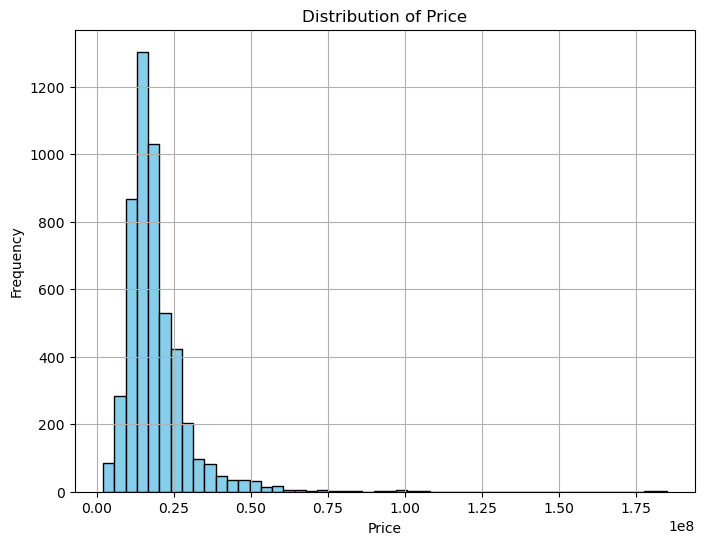

In [22]:
#-------------------------- 

plt.figure(figsize=(8,6))
plt.hist(df['price'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 2 step. Draw a figure with price vs area

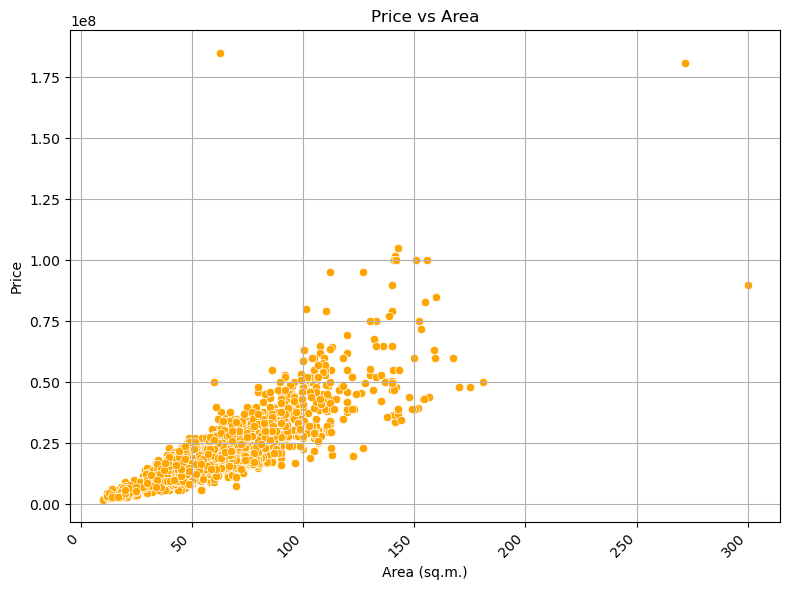

In [23]:
#-------------------------- 

plt.figure(figsize=(8,6))
sns.scatterplot(x='area', y='price', data=df, color='orange')


plt.title('Price vs Area')
plt.xlabel('Area (sq.m.)')
plt.ylabel('Price')


plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

plt.grid(True)
plt.show()

#### 3 step. Boxplot with type of house and year

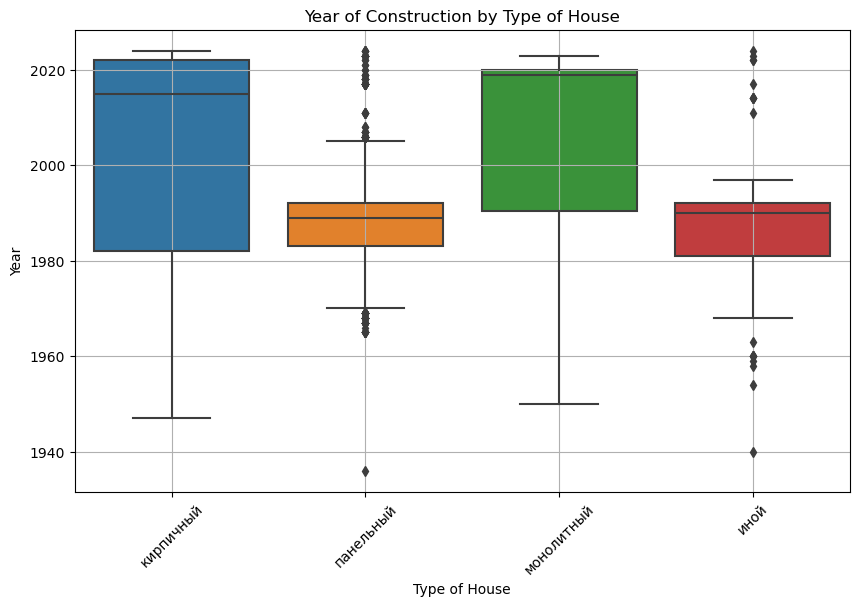

In [24]:
#-------------------------- 

plt.figure(figsize=(10,6))
sns.boxplot(x='type_of_house', y='year', data=df)
plt.title('Year of Construction by Type of House')
plt.xlabel('Type of House')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4 step. Correlation matrix

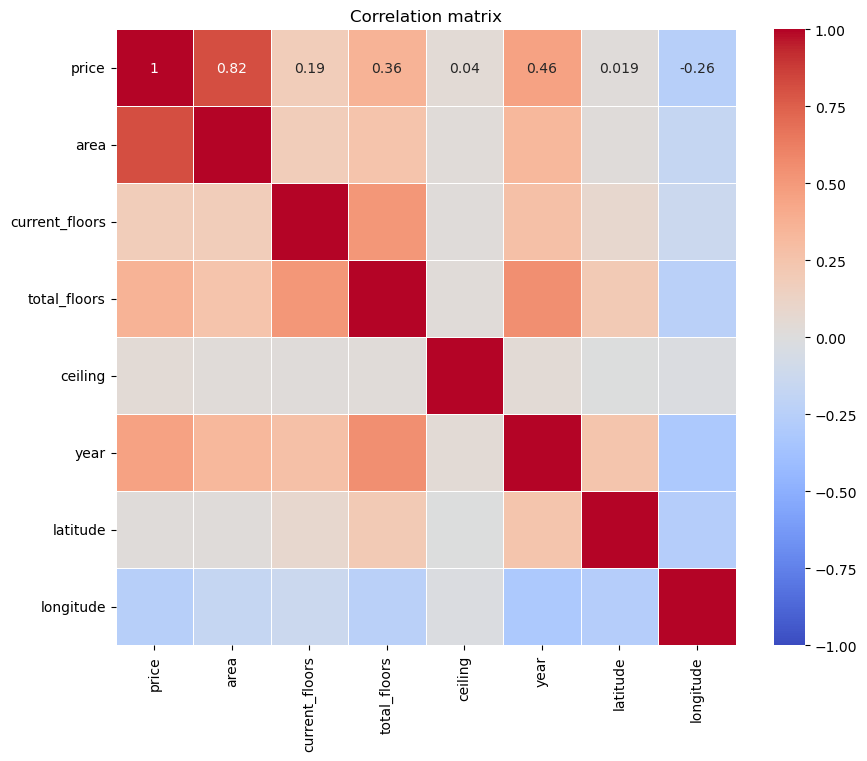

In [25]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation matrix")
plt.show()